# 1. Lý thuyết

1)  Đặc diểm của kiến trúc RNN là gì ?

A. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trong tương lai được sử dụng như input của step hiện tại.

B. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện một cách song song và output của các step trước được sử dụng như input của step hiện tại.

C. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trước được sử dụng như input của step hiện tại.

D. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo chiều từ phải sang trái cho tới khi trở về vị trí đầu tiên.

2) Nhận định nào sau đây là đúng về RNN?

A. Kiến trúc RNN dự báo song song các output một lúc.

B. Kiến trúc RNN không chia sẻ tham số giữa các units. Do đó kích thước mạng sẽ gia tăng theo độ dài văn bản.

C. Kiến trúc RNN có thể tổng hợp được thông tin trong tương lai để dự báo hiện tại.

D. Kiến trúc RNN chia sẻ tham số trên toàn bộ các units nên số lượng tham số không phụ thuộc vào độ dài văn bản.

3) Để huấn luyện mạng RNN thì một chú ý quan trọng tại time step t=0 chúng ta cần làm gì ?

A. Mã hóa từ đầu vào thành một ma trận đại số.

B. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị phân phối xác suất của biến mục tiêu.

C. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng mã hóa biểu diễn cho từ đầu vào tại bước $t=0$.

D. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng kích hoạt tính toán.

4) Sự khác biệt giữa RNN và CNN là gì?

A. RNN là kiến trúc truy hồi có thể trả ra kết quả dự báo ở nhiều timestep. CNN không có khả năng truy hồi để dự báo theo timestep

B. RNN có tính truy hồi và kiến trúc không chia sẻ tham số giữa các units. Trong khi CNN chia sẻ tham số ở phân phối xác suất đầu ra. 

C. RNN có số lượng tham số thay đổi theo độ dài văn bản. Trong khi đó CNN luôn có số lượng tham số xác định trước.

D. RNN có thể dự báo theo một chiều trong khi CNN chỉ dự báo được theo hai chiều.

5) Véc tơ context trong kiến trúc LSTM và GRU có tác dụng gì ?

A. Là véc tơ biểu diễn của đầu vào $x_t$ tại mỗi bước.

B. Ghi nhận bối cảnh xuyên suốt toàn bộ chuỗi tính đến thời điểm hiện tại

C. Là véc tơ cập nhật và loại bỏ thông tin mới tại mỗi bước.

D. Kích hoạt thông tin tại mỗi timestep


1C - 2D - 3D - 4A - 5B


# 2. Thực hành


6. Từ bộ dữ liệu [Sentiment-analysis-on-movie-reviews](https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data) hãy sử dụng các thuật toán trong RNN để huấn luyện mô hình phân loại cảm xúc văn bản. (1 điểm)

7. Sử dụng mô hình LSTM để dự báo tổng số lượng khách hàng sử dụng dịch vụ hàng không [air- passengers](https://www.kaggle.com/datasets/rakannimer/air-passengers) (2 điểm)

8. Xây dựng một mô hình thêm dấu Tiếng Việt sử dụng LSTM. Cách xử lý để tạo bộ dữ liệu có thể tham khảo tại [them dau tieng viet](https://phamdinhkhanh.github.io/2020/05/28/TransformerThemDauTV.html#1-d%E1%BB%AF-li%E1%BB%87u). (2 điểm)



# Câu 6

The sentiment labels are:

0 - negative

1 - somewhat negative

2 - neutral

3 - somewhat positive

4 - positive

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPool1D, Dropout
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/10.LSTM

/content/gdrive/MyDrive/Colab Notebooks/10.LSTM


In [ ]:
# READ THE CSV FILES
train_data = pd.read_csv('../10.LSTM/train.tsv', sep='\t')
test_data = pd.read_csv('../10.LSTM/test.tsv', sep='\t')

In [ ]:
train_data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


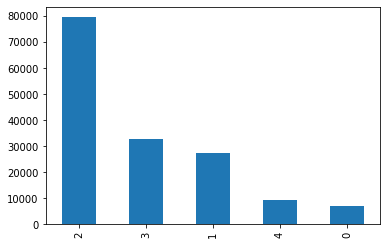

In [ ]:
train_data['Sentiment'].value_counts().plot(kind='bar')

In [ ]:
x_train = []
x_train = train_data['Phrase']
print(type(x_train))
x_train = np.asarray(x_train)
print(type(x_train))
x_train.shape

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


(156060,)

In [ ]:
y_train=[]
y_train = train_data['Sentiment']
y_train = np.asarray(y_train)
print(type(y_train))
y_train.shape

<class 'numpy.ndarray'>


(156060,)

In [ ]:
x_train = [rev.replace(",","").replace(".","").lower() for rev in x_train]

In [ ]:
(x_train[0])

'a series of escapades demonstrating the adage that what is good for the goose is also good for the gander  some of which occasionally amuses but none of which amounts to much of a story '

In [ ]:
Y_train = np.zeros((y_train.size, y_train.max()+1))
Y_train[np.arange(y_train.size),y_train] = 1
Y_train

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
review_max_len = 200
vocab_size = 5000

In [ ]:
from keras.preprocessing.text import one_hot

x_train_num = [one_hot(i,vocab_size) for i in x_train]

In [ ]:
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(x_train_num,maxlen=review_max_len)
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Conv1D,MaxPool1D
from keras.layers.embeddings import Embedding

In [ ]:
model = Sequential()

model.add(Embedding(vocab_size,
                   32,
                   input_length=review_max_len))

model.add(Conv1D(32,(3),activation='relu'))
model.add(MaxPool1D(2))
model.add(LSTM(80,dropout=0.25,recurrent_dropout=0.25))
model.add(Dense(5,activation='softmax'))

model.compile(optimizer='adam',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 198, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 32)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 80)                36160     
                                                                 
 dense (Dense)               (None, 5)                 405       
                                                                 
Total params: 199,669
Trainable params: 199,669
Non-trainable params: 0
__________________________________________________

In [ ]:
model.fit(X_train,Y_train,
         batch_size=256,
         epochs=3)

Epoch 1/3
610/610 [==============================] - 325s 529ms/step - loss: 1.1211 - accuracy: 0.5550
Epoch 2/3
610/610 [==============================] - 288s 472ms/step - loss: 0.9430 - accuracy: 0.6192
Epoch 3/3
610/610 [==============================] - 288s 472ms/step - loss: 0.8882 - accuracy: 0.6405


In [ ]:
x_test = []
x_test = test_data['Phrase']
print(type(x_train))
x_test = np.asarray(x_test)
print(type(x_test))
x_test.shape

<class 'list'>
<class 'numpy.ndarray'>


(66292,)

In [ ]:
x_test = [rev.replace(",","").replace(".","").lower() for rev in x_test]

In [ ]:
x_test_num = [one_hot(i,vocab_size) for i in x_test]
X_test = sequence.pad_sequences(x_test_num,maxlen=review_max_len)
X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
predicts = model.predict(X_test,
                        batch_size=256,
                        verbose=2)

259/259 - 24s - 24s/epoch - 93ms/step


In [ ]:
preds_final = [np.argmax(i) for i in predicts]
print(len(preds_final))

66292


In [ ]:
out = pd.DataFrame(data=test_data.PhraseId,columns=['PhraseId'])
out

,PhraseId
0,156061
1,156062
2,156063
3,156064
4,156065
...,...
66287,222348
66288,222349
66289,222350
66290,222351


In [ ]:
out['Sentiment'] = preds_final
out

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [ ]:
out.to_csv('submission_bt6.csv', index=False)

# Câu 7

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.models import Sequential

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/10.LSTM/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.columns = ['Date', 'Passengers']
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data.isnull().mean()

Passengers    0.0
dtype: float64

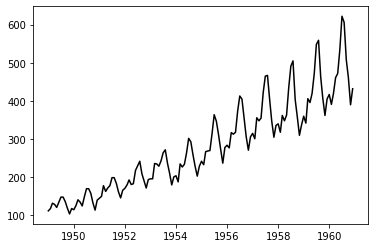

In [ ]:
plt.plot(data, color='black')
plt.show()

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler()
data['Passengers'] = scaler.fit_transform(data['Passengers'].values.reshape(-1,1))
data.head()

,Passengers
Date,
1949-01-01,0.015444
1949-02-01,0.027027
1949-03-01,0.054054
1949-04-01,0.048263
1949-05-01,0.032819


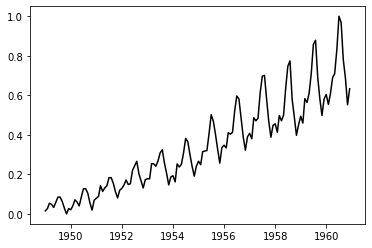

In [ ]:
plt.plot(data, color='black')
plt.show()

In [ ]:
def load_data(data, seq_len):
    x = []
    y = []
    for i in range(seq_len, len(data)):
        x.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
    return x,y

In [ ]:
x, y = load_data(data, 20)

In [ ]:
print(data.shape)
num = int(len(data['Passengers'])*0.8)
num

(144, 1)


115

In [ ]:
x_train = x[:num]
y_train = y[:num]
x_test = x[num:]
y_test = y[num:]

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train = np.reshape(x_train, (num, 20, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 20, 1))

In [ ]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (115, 20, 1)
y_train.shape =  (115,)
x_test.shape =  (9, 20, 1)
y_test.shape =  (9,)


Define model

In [ ]:
lstmModel = Sequential()
lstmModel.add(LSTM(100, activation="ReLU", return_sequences=True, input_shape=(x_train.shape[1], 1)))
lstmModel.add(Dropout(0.2))
lstmModel.add(LSTM(80, activation="ReLU", return_sequences=True))
lstmModel.add(Dropout(0.2))
lstmModel.add(LSTM(50, activation="ReLU", return_sequences=True))
lstmModel.add(Dropout(0.2))
lstmModel.add(LSTM(30, activation="ReLU"))
lstmModel.add(Dense(1))
lstmModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 20, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 80)            57920     
                                                                 
 dropout_1 (Dropout)         (None, 20, 80)            0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 50)            26200     
                                                                 
 dropout_2 (Dropout)         (None, 20, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 30)                9

In [ ]:
lstmModel.compile(optimizer="adam", loss="MSE")
lstmModel.fit(x_train, y_train, epochs=15, batch_size=50)

Epoch 1/15
3/3 [==============================] - 5s 60ms/step - loss: 0.1575
Epoch 2/15
3/3 [==============================] - 0s 53ms/step - loss: 0.1360
Epoch 3/15
3/3 [==============================] - 0s 55ms/step - loss: 0.1011
Epoch 4/15
3/3 [==============================] - 0s 52ms/step - loss: 0.0537
Epoch 5/15
3/3 [==============================] - 0s 53ms/step - loss: 0.0246
Epoch 6/15
3/3 [==============================] - 0s 55ms/step - loss: 0.0240
Epoch 7/15
3/3 [==============================] - 0s 53ms/step - loss: 0.0160
Epoch 8/15
3/3 [==============================] - 0s 54ms/step - loss: 0.0203
Epoch 9/15
3/3 [==============================] - 0s 54ms/step - loss: 0.0183
Epoch 10/15
3/3 [==============================] - 0s 61ms/step - loss: 0.0156
Epoch 11/15
3/3 [==============================] - 0s 56ms/step - loss: 0.0165
Epoch 12/15
3/3 [==============================] - 0s 53ms/step - loss: 0.0132
Epoch 13/15
3/3 [==============================] - 0s 55ms/st

In [ ]:
lstmPredict = lstmModel.predict(x_test)
lstmScore = r2_score(y_test, lstmPredict)
print("R2 Score : ", lstmScore)

R2 Score :  -0.4387350461855608


In [ ]:
def plot_predictions(test, predicted, title, x):
    plt.figure(figsize=(16,4))
    plt.plot(x ,test, color='blue',label='Actual')
    plt.plot(x ,predicted, alpha=0.7, color='red',label='Predict')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.legend()
    plt.show()

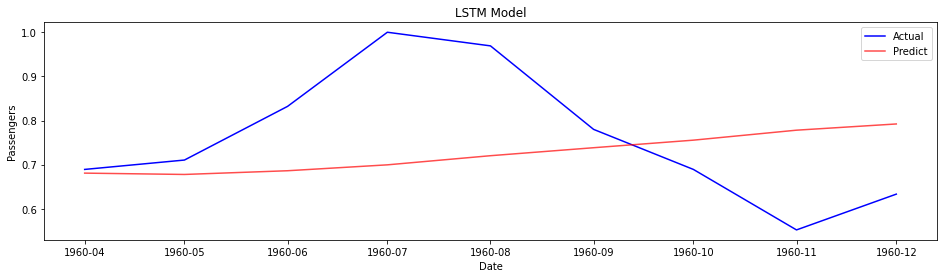

In [ ]:
plot_predictions(y_test, lstmPredict, "LSTM Model", data.index[-9:])

# Câu 8

In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/10.LSTM

/content/gdrive/MyDrive/Colab Notebooks/10.LSTM


In [ ]:
# !unzip ../10.LSTM/out.zip -d ../themdau_tv

In [ ]:
%cd ../10.LSTM/themdau_tv/

/content/gdrive/MyDrive/Colab Notebooks/10.LSTM/themdau_tv


In [ ]:
!ls tokenizer

input_vocab.txt  output_vocab.txt  tokenizer_ipt.pkl  tokenizer_opt.pkl


In [ ]:
!pip install tensorflow_datasets

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

import time
import numpy as np
import matplotlib.pyplot as plt

# Load tokenizer
import pickle

def _save_pickle(path, obj):
  with open(path, 'wb') as f:
    pickle.dump(obj, f)

def _load_pickle(path):
  with open(path, 'rb') as f:
    obj = pickle.load(f)
  return obj

tokenizer_ipt = _load_pickle('tokenizer/tokenizer_ipt.pkl')
tokenizer_opt = _load_pickle('tokenizer/tokenizer_opt.pkl')

In [ ]:
# Khai báo tham số
num_layers = 4
d_model = 128
dff = 512
num_heads = 8

# input_vocab_size = tokenizer_ipt.vocab_size + 2
# target_vocab_size = tokenizer_opt.vocab_size + 2
dropout_rate = 0.1
learning_rate = 0.01

In [ ]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, pe_input, pe_target, rate=0.1):
    super(Transformer, self).__init__()

    self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                           input_vocab_size, pe_input, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                           target_vocab_size, pe_target, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
  def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):
    # print('enc_padding_mask: ', enc_padding_mask)
    enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)
    
    # dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)
    
    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
    
    return final_output, attention_weights

In [ ]:
# Load model
transformer = Transformer(num_layers=num_layers, d_model=d_model, num_heads=num_heads, dff=dff,
                          input_vocab_size=input_vocab_size, target_vocab_size=target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout_rate)

checkpoint_path = "./checkpoints/train_500k"

ckpt = tf.train.Checkpoint(transformer=transformer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)

In [ ]:
def evaluate(inp_sentence):
  start_token = [ipt_vocab_size]
  end_token = [ipt_vocab_size+1]
  
  # inp sentence is non_diacritic, hence adding the start and end token
  inp_sentence = start_token + tokenizer_ipt.encode(inp_sentence) + end_token
  encoder_input = tf.expand_dims(inp_sentence, 0)
  
  # as the target is exist diacritic, the first word to the transformer should be the
  # english start token.
  decoder_input = [opt_vocab_size]
  output = tf.expand_dims(decoder_input, 0)
    
  for i in range(MAX_LENGTH):
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
        encoder_input, output)
  
    # predictions.shape == (batch_size, seq_len, vocab_size)
    predictions, attention_weights = transformer(encoder_input, 
                                                 output,
                                                 False,
                                                 enc_padding_mask,
                                                 combined_mask,
                                                 dec_padding_mask)
    
    # select the last word from the seq_len dimension
    predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    # return the result if the predicted_id is equal to the end token
    if predicted_id == opt_vocab_size+1:
      return tf.squeeze(output, axis=0), attention_weights
    
    # concatentate the predicted_id to the output which is given to the decoder
    # as its input.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0), attention_weights

In [ ]:
def add_diacritic(sentence, plot=''):
  result, attention_weights = evaluate(sentence)
  predicted_sentence = tokenizer_opt.decode([i for i in result 
                                            if i < opt_vocab_size])  
  print('Input: {}'.format(sentence))
  print('Predicted translation: {}'.format(predicted_sentence))
  if plot:
    plot_attention_weights(attention_weights, sentence, result, plot)